In [20]:
%run "part01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data_client.head()

,GrossRevenueTotal,RecencyDays,Frequency
CustomerID,,,
17850,5288.63,373.0,34.0
13047,3079.10,32.0,10.0
12583,7187.34,3.0,15.0
13748,948.25,96.0,5.0
15100,635.10,334.0,3.0


In [45]:
rfm = data_client.copy()

In [46]:
rfm = data_client.dropna()

In [47]:
r_labels = range(5, 0, -1)
f_labels = range(1, 6, 1)
m_labels = range(1, 10, 1)

rfm["R"] = pd.qcut(rfm["RecencyDays"], 5, labels = r_labels)
rfm["F"] = pd.qcut(rfm["Frequency"].rank(method = 'first'), 5, labels = f_labels)
rfm["M"] = pd.qcut(rfm["GrossRevenueTotal"], 9, labels = m_labels)

rfm.sample(20)

,GrossRevenueTotal,RecencyDays,Frequency,R,F,M
CustomerID,,,,,,
15212,88.95,242.0,1.0,1,1,1
16729,7076.28,39.0,21.0,3,5,9
15675,323.69,82.0,3.0,2,3,3
16153,1824.23,50.0,5.0,3,4,7
16940,3049.88,53.0,3.0,3,3,8
14321,1530.75,11.0,5.0,5,4,7
15365,1330.45,26.0,7.0,4,5,7
14317,508.58,65.0,1.0,3,2,4
15303,574.02,291.0,1.0,1,1,5


In [48]:
rfm["RFM"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm["Score"] = rfm[["R", "F", "M"]].sum(axis = 1)

In [49]:
segt_map = {
    r'[1-2][1-2][1-9]': 'Hinernating',
    r'[1-2][3-4][1-9]': 'At Risk',
    r'[1-2]5[1-9]': 'Cannot Lose Them',
    r'3[1-2][1-9]': 'About to Sleep',
    r'33[1-9]': 'Need Attention',
    r'[3-4][4-5][1-9]': 'Loyal Customers',
    r'41[1-9]': 'Promising',
    r'51[1-9]': 'New Customers',
    r'[4-5][2-3][1-9]': 'Potential Loyalists',
    r'5[4-5][1-9]': 'Champions'
}

rfm['Segment'] = rfm['RFM'].replace(segt_map, regex=True)
#rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) 
rfm.head()

,GrossRevenueTotal,RecencyDays,Frequency,R,F,M,RFM,Score,Segment
CustomerID,,,,,,,,,
17850,5288.63,373.0,34.0,1,5,9,159,15,Cannot Lose Them
13047,3079.10,32.0,10.0,4,5,8,458,17,Loyal Customers
12583,7187.34,3.0,15.0,5,5,9,559,19,Champions
13748,948.25,96.0,5.0,2,4,6,246,12,At Risk
15100,635.10,334.0,3.0,1,3,5,135,9,At Risk


In [50]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot Lose Them": [4, 5, 0, 0.4],
                   "At Risk": [2, 4, 0, 0.4],
                   "Hinernating": [0, 2, 0, 0.4],
                   "About to Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

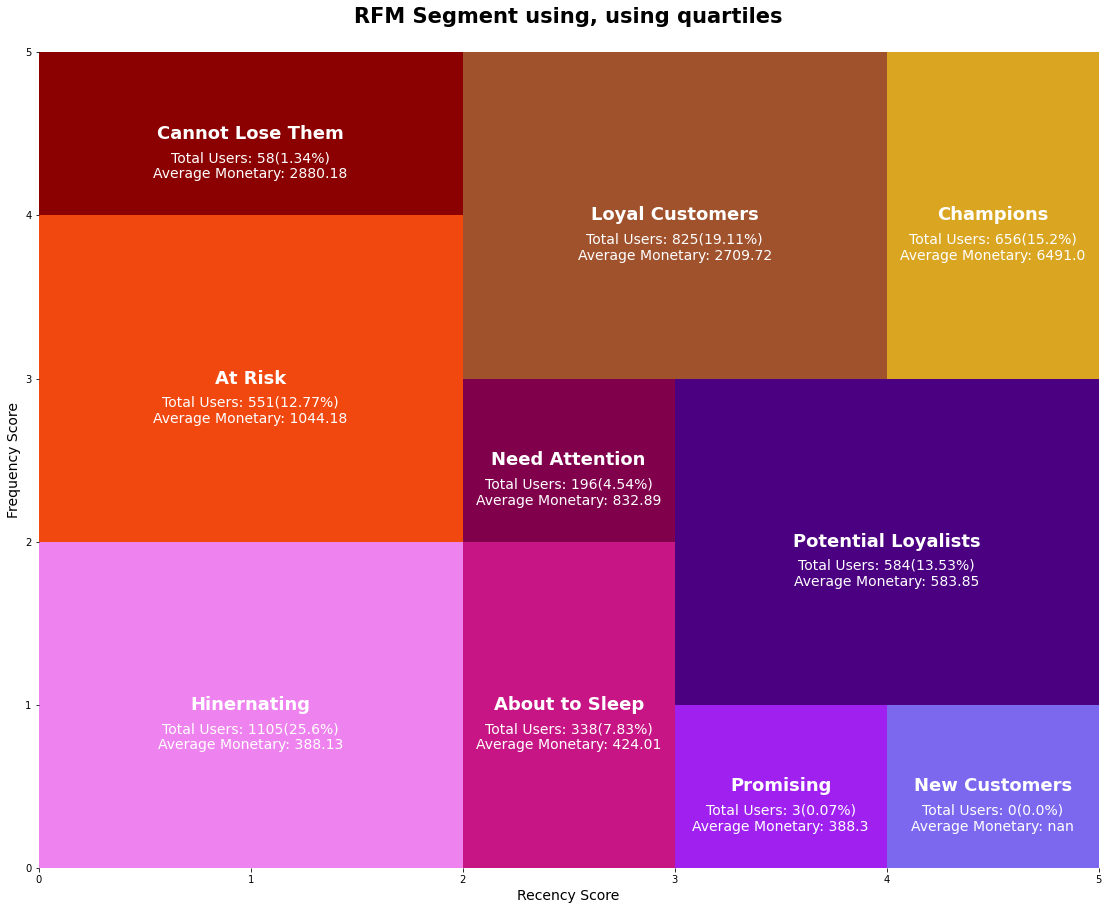

In [53]:
fig, ax = plt.subplots(figsize = (19, 15))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"

palette = ["#DAA520", "#A0522D", "#8B0000", "#F1480F",  "#EE82EE", 
           "#C71585", "#A020F0", "#7B68EE", "#4B0082", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)
    
    users = rfm[rfm.Segment == key].shape[0]
    users_percentage = (rfm[rfm.Segment == key].shape[0] / rfm.shape[0]) * 100
    avg_monetary = rfm[rfm.Segment == key]["GrossRevenueTotal"].mean()
    
    user_txt = "\n\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))
    
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 14, color = "white")    
    
    ax.set_xlabel("Recency Score", fontsize=14)
    ax.set_ylabel("Frequency Score", fontsize=14)
    
sns.despine(left = True, bottom = True)

plt.title('RFM Segment using, using quartiles\n', fontsize='21', fontweight='bold')
plt.savefig("..//images//rfm_statistic.png")
plt.show()

In [31]:
rfm_table2 = rfm.reset_index()

rfm_monetary_size = rfm_table2.groupby("Segment").agg({"GrossRevenueTotal": "mean",
                                                       "CustomerID": "nunique"})

rfm_monetary_size.rename(columns = {"GrossRevenueTotal": "MeanMonetary", "CustomerID": "CustomerCount"}, inplace = True)
rfm_monetary_size = rfm_monetary_size.sort_values("MeanMonetary", ascending = False)
rfm_monetary_size

,MeanMonetary,CustomerCount
Segment,,
Champions,6491.003735,656
Cannot Lose Them,2880.180862,58
Loyal Customers,2709.716036,825
At Risk,1044.180998,551
Need Attention,832.885561,196
Potential Loyalists,583.851490,584
About to Sleep,424.005178,338
Promising,388.300000,3
Hibernating,388.134805,1105


In [32]:
# fm = rfm_table2.groupby("Segment").agg({"CustomerID": "nunique", 
#                                         "RecencyDays": "mean",
#                                         "Frequency": "mean",
#                                         "GrossRevenueTotal": "mean"})
# rfm.rename(columns = {"CustomerID": "Segment Size"}, inplace = True)

# cm = sns.light_palette("#A2A2A2", as_cmap = True)

# rfm.T.style.background_gradient(cmap = cm, axis = 1)\
# .set_precision(2)\
# .highlight_min(axis = 1, color = "#195190")\
# .highlight_max(axis = 1, color = "#D60000")

In [12]:
plt.figure(figsize=(18,10))
plt.title('clients')
sns.countplot(x=rfm.Segment) 
plt.xlabel('Store Rank')
plt.ylabel('Counts') 
#plt.savefig("..//images//sales_rank.png")
plt.show()

NameError: name 'plt' is not defined

In [13]:
clients = rfm[['Segment', 'GrossRevenueTotal', 'RecencyDays', 'Frequency', 'Score']].groupby('Segment').mean()
clients.reset_index(inplace = True)
clients.sort_values(by='Score', ascending=False, inplace=True)
clients

,Segment,GrossRevenueTotal,RecencyDays,Frequency,Score
3,Champions,6491.003735,6.407012,12.083841,17.342988
5,Loyal Customers,2709.716036,33.499394,6.454545,15.133333
2,Cannot lose them,2880.180862,129.706897,8.586207,14.379310
6,Need Attention,832.885561,52.229592,2.316327,10.862245
7,Potential Loyalists,583.851490,17.950342,1.732877,10.676370
1,At-Risk,1044.180998,140.212341,2.980036,10.290381
0,About To Sleep,424.005178,53.426036,1.142012,8.115385
8,Promising,388.300000,20.333333,1.000000,8.000000
4,Hibernating,388.134805,221.739367,1.139367,5.441629
